In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
from conv_emergence import main as simulate
from conv_emergence import compute_entropy as entropy
from conv_emergence import make_key
from viz_box import position_mean_var, ipr, entropy_sort, mean_sort, var_sort, plot_receptive_fields
from itertools import product

In [2]:
SWEEP = np.array(list(product(['tanh', 'relu'], ['mse', 'ce'], ['learnable_bias', 'linear', 0.0])))
def mini_sweep(task, xi1, xi2, L, K, batch_size, num_epochs, lr, second_scale=1.0, gain=None, save_=True):
    kwargs = dict(task=task, xi1=xi1, xi2=xi2, L=L, K=K, batch_size=batch_size, num_epochs=num_epochs, lr=lr, gain=gain, second_scale=second_scale, save_=save_)
    weights, losses, accs, iprs = [], [], [], []
    for activation, loss, second_layer in SWEEP:
        kwargs['activation'] = activation
        kwargs['loss'] = loss
        kwargs['second_layer'] = second_layer
        path_key = make_key(**kwargs)
        # print(path_key)
        if path_key + '.npz' in os.listdir('weights/'):
            print('Already simulated')
            data = np.load('weights/' + path_key + '.npz', allow_pickle=True)
            weights_, losses_, accs_, iprs_ = data['weights'], data['losses'], data['accs'], data['iprs']
        else:
            print('Simulating')
            weights_, (losses_, accs_, iprs_) = simulate(**kwargs)
        weights.append(weights_)
        losses.append(losses_); accs.append(accs_); iprs.append(iprs_)
    weights = np.array(weights)
    losses, accs, iprs = np.array(losses), np.array(accs), np.array(iprs)
    return weights, (losses, accs, iprs)

In [3]:
kwargs = dict(
    task='nlgp',
    xi1 = 4, #(0.55, 0.6), # (0.1, 0.6),
    xi2 = 2, #(0.05, 0.1),
    gain = 2,
    L = 40,
    K = 100,
    batch_size = 1000,
    num_epochs = 10000,
    save_ = False,
    lr = 0.05,#0.01,#0.1,
    activation = 'tanh',
    second_layer = 'linear',
    second_scale = 0.01 # 1.0 works well, 1e-4 works too but seem smaller in scale, down 1e-12 even works
)

In [4]:
kwargs = dict(
    task='single_pulse',
    xi1 = (0.5, 0.55), # (0.1, 0.6),
    xi2 = (0.15, 0.2),
    L = 100,
    K = 40,
    batch_size = 1000,
    num_epochs = 10000,
    save_ = True,
    lr = 0.1,#0.01,#0.1,
    # activation = 'relu', #'relu',
    # second_layer = -3.0, #'learnable_bias',
    second_scale = 1e-2, # 1.0 works well, 1e-4 works too but seem smaller in scale, down 1e-12 even works\
    # loss='ce',
)

In [5]:
weights, (losses, accs, iprs) = mini_sweep(**kwargs)

Already simulated
Already simulated
Simulating
Arguments:
task: single_pulse
xi1: (0.5, 0.55)
xi2: (0.15, 0.2)
L: 100
K: 40
gain: None
dim: 1
batch_size: 1000
num_epochs: 10000
loss: mse
lr: 0.1
activation: tanh
second_layer: 0.0
second_scale: 0.01
path: .
save_: True
kwargs: {}


NotImplementedError: second_layer must be 'linear', 'learnable_bias', or a float

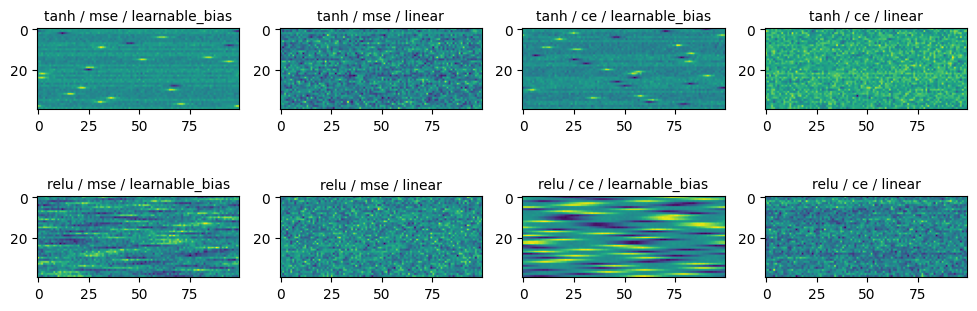

In [18]:
fig, axs = plt.subplots(2, 4, figsize=(12, 4))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(weights[i,-1,:,:])
    ax.set_title(" / ".join(SWEEP[i]), fontsize=10)

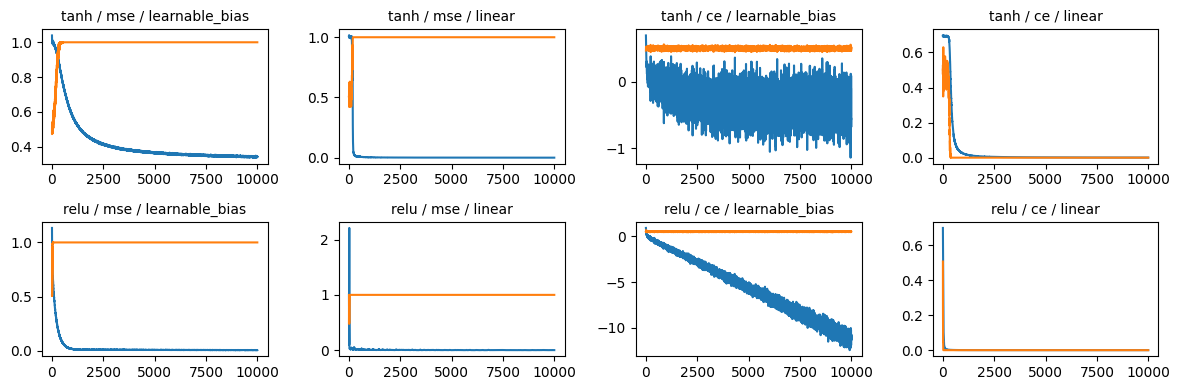

In [22]:
fig, axs = plt.subplots(2, 4, figsize=(12, 4))
for i, ax in enumerate(axs.flatten()):
    ax.plot(losses[i], label="loss")
    ax.plot(accs[i], label="acc")
    ax.set_title(" / ".join(SWEEP[i]), fontsize=10)
fig.tight_layout()

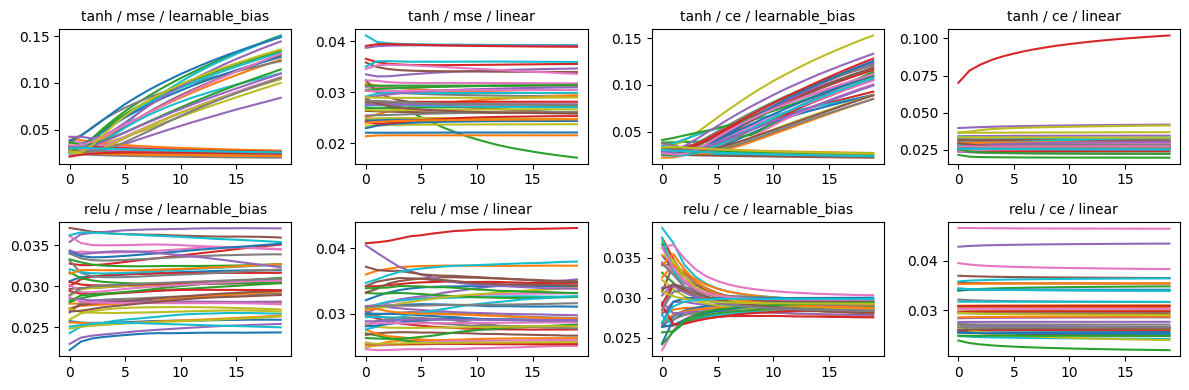

In [23]:
fig, axs = plt.subplots(2, 4, figsize=(12, 4))
for i, ax in enumerate(axs.flatten()):
    ax.plot(iprs[i], label="loss")
    ax.set_title(" / ".join(SWEEP[i]), fontsize=10)
fig.tight_layout()

In [ ]:
weights, (losses, accs, iprs) = simulate(**kwargs)

Arguments:
task: single_pulse
xi1: (0.5, 0.55)
xi2: (0.15, 0.2)
L: 100
K: 40
gain: 1.1
dim: 1
batch_size: 1000
num_epochs: 10000
loss: ce
lr: 1.0
activation: relu
second_layer: -3.0
second_scale: 0.01
path: .
save_: False
kwargs: {}
Iteration 500: loss=0.3307, acc=0.9613, IPR>0.05=0.00%
Iteration 1000: loss=0.2427, acc=1.0000, IPR>0.05=0.00%
Iteration 1500: loss=0.2311, acc=1.0000, IPR>0.05=2.50%
Iteration 2000: loss=0.2255, acc=1.0000, IPR>0.05=2.50%
Iteration 2500: loss=0.2219, acc=1.0000, IPR>0.05=10.00%
Iteration 3000: loss=0.2184, acc=1.0000, IPR>0.05=32.50%
Iteration 3500: loss=0.2155, acc=1.0000, IPR>0.05=45.00%
Iteration 4000: loss=0.2129, acc=1.0000, IPR>0.05=60.00%
Iteration 4500: loss=0.2103, acc=1.0000, IPR>0.05=90.00%
Iteration 5000: loss=0.2075, acc=1.0000, IPR>0.05=95.00%
Iteration 5500: loss=0.2055, acc=1.0000, IPR>0.05=100.00%
Iteration 6000: loss=0.2031, acc=1.0000, IPR>0.05=100.00%
Iteration 6500: loss=0.2008, acc=1.0000, IPR>0.05=100.00%
Iteration 7000: loss=0.1987,

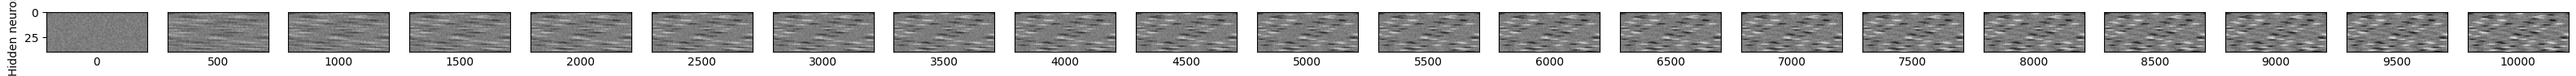

In [34]:
# weights_ = np.swapaxes(weights, 1, 2)
fig, axs = plot_receptive_fields(weights, num_cols=21, evaluation_interval=500, figsize=(40, 20), reordering_fn=entropy_sort, ind=-1)

(<Figure size 4000x2000 with 3 Axes>,
 array([<Axes: xlabel='0', ylabel='Hidden neurons'>, <Axes: xlabel='500'>,
        <Axes: xlabel='1000'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >], dtype=object))

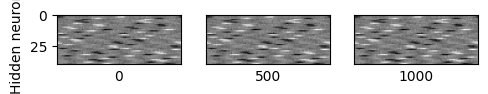

In [35]:
plot_receptive_fields(weights[-3:], num_cols=21, evaluation_interval=500, figsize=(40, 20), reordering_fn=entropy_sort, ind=-1)

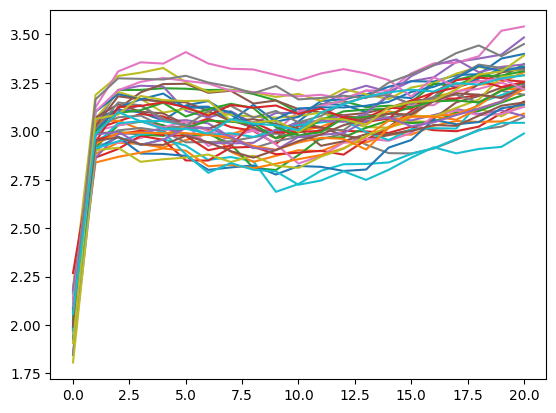

In [36]:
_ = plt.plot(np.stack([entropy(weight) for weight in weights]))

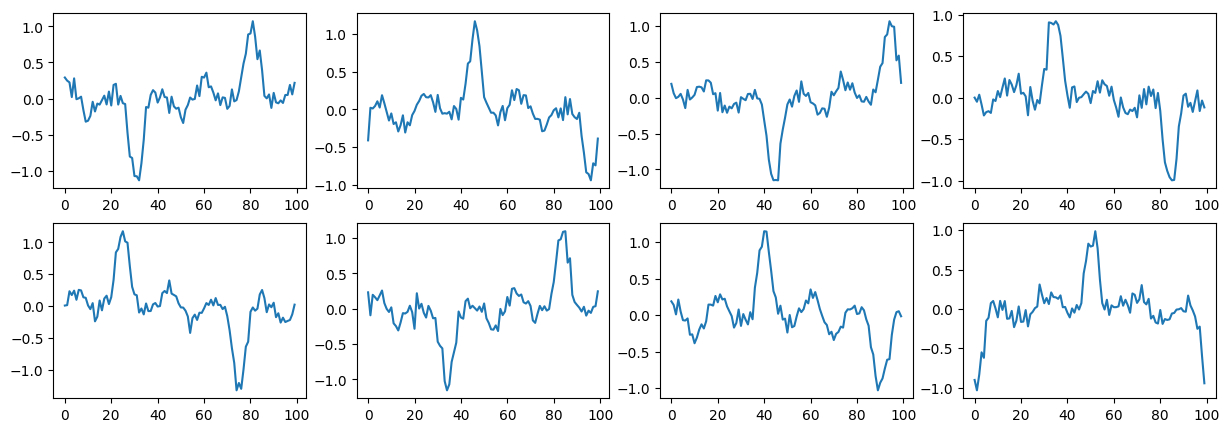

In [37]:
fig, axs = plt.subplots(2, 4, figsize=(15, 5))
for i, ax in enumerate(axs.flatten()):
    ax.plot(weights[-1,i,:])

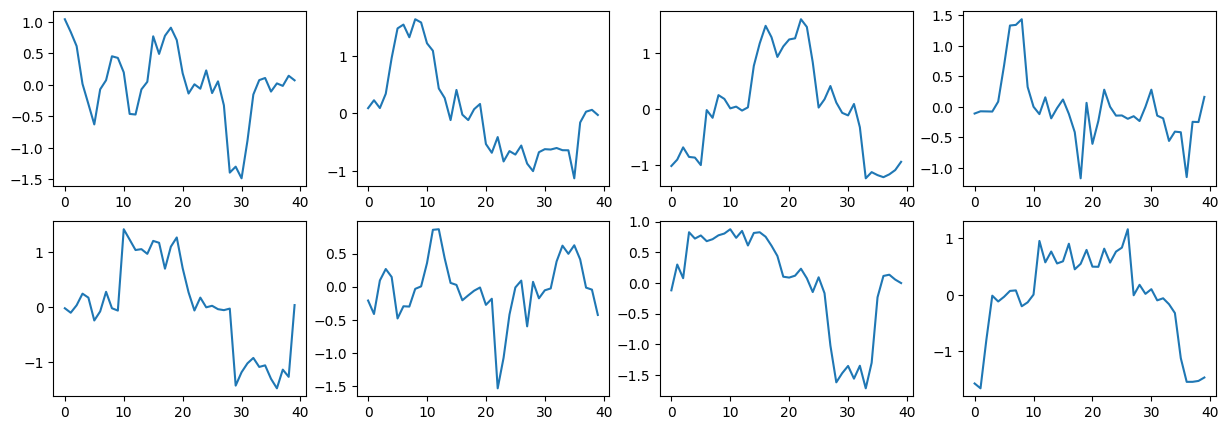

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(15, 5))
for i, ax in enumerate(axs.flatten()):
    ax.plot(weights[-1,i,:])

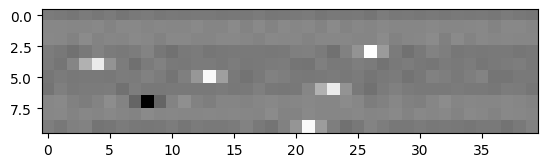

In [28]:
weight_ = weights[-1]
plt.imshow(weight_[:10], cmap='gray')
localized_inds = np.array([3, 4, 5, 6, 7, 9])
oscillatory_inds = np.array([0, 1, 2, 8])

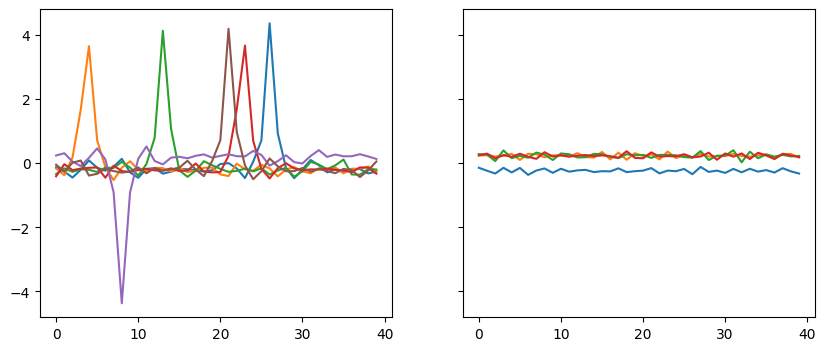

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1.plot(weight_[localized_inds].T)
ax2.plot(weight_[oscillatory_inds].T)

### With xi1 = [0.1,0.6)

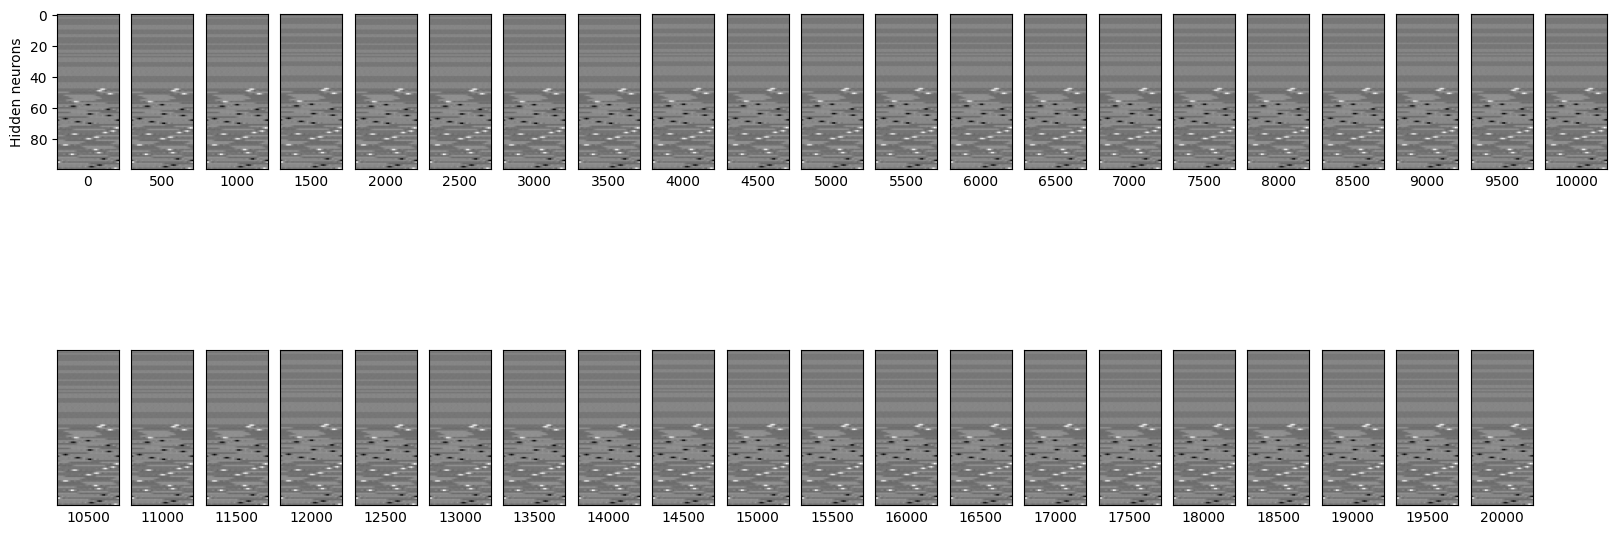

In [10]:
fig, axs = plot_receptive_fields(weights, num_cols=21, evaluation_interval=500, figsize=(20, 8), reordering_fn=entropy_sort, ind=-1)

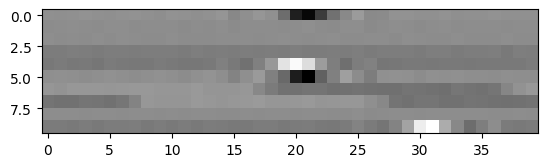

In [16]:
weight_ = weights[-1]
plt.imshow(weight_[:10], cmap='gray')
localized_inds = np.array([0, 4, 5, 9])
oscillatory_inds = np.array([1, 2, 3, 6, 7, 8])

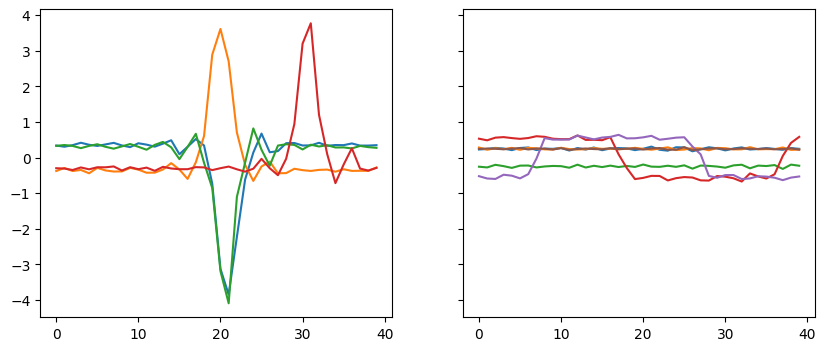

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
ax1.plot(weight_[localized_inds].T)
ax2.plot(weight_[oscillatory_inds].T)

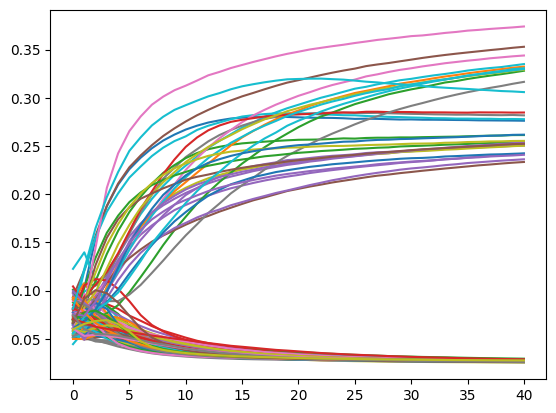

In [22]:
plt.plot(iprs)